In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd

In [14]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise = 60, random_state=13)

In [12]:
X.shape
y.shape

(4,)

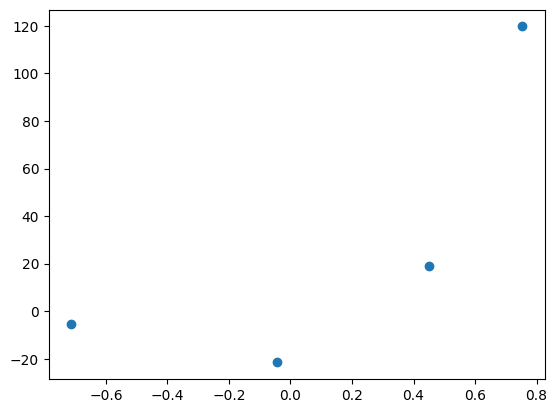

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [16]:
# use OLS method
from sklearn.linear_model import LinearRegression
linear = LinearRegression()


In [17]:
linear.fit(X,y)

LinearRegression()

In [18]:
linear.coef_

array([73.98903908])

In [19]:
linear.intercept_

np.float64(19.619724632349467)

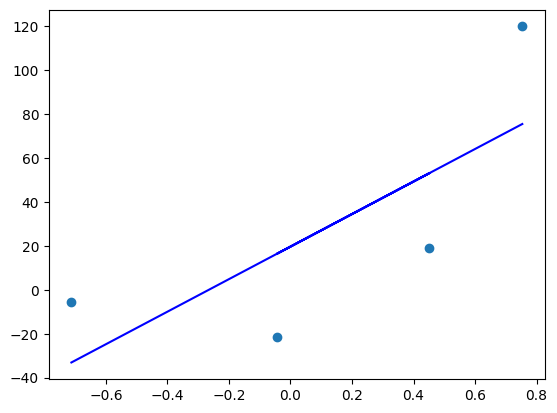

In [20]:
plt.scatter(X,y)
plt.plot(X, linear.predict(X), color='blue')

In [21]:
# now using gradient descent
# assume slope is constant = 73.98
# initial value of b = 0
w = (73.98*X)+0

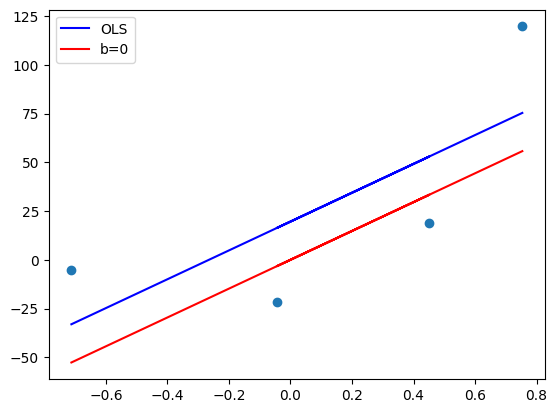

In [22]:
plt.scatter(X,y)
plt.plot()
plt.plot(X, linear.predict(X), color='blue', label='OLS')
plt.plot(X, w, color='red', label='b=0')
plt.legend()
plt.show()

In [23]:
# we need to optimise this by applying gradient descent so that red line moves towards blue line
b = 0
m=73.98
loss = -2 * np.sum(y-X.ravel()-b)
loss

np.float64(-222.45596770175734)

In [25]:
lr = 0.1
b_new = b - lr*loss
b_new
y_pred_new = 73.98*X + b_new

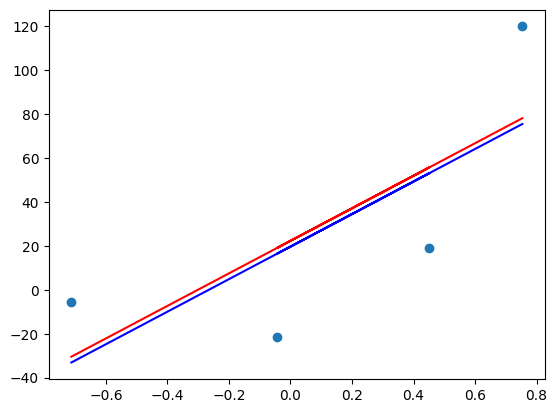

In [26]:
plt.scatter(X,y)
plt.plot(X, linear.predict(X), color = 'blue', label='ols')
plt.plot(X, y_pred_new, color='red', label='gradient')

In [ ]:
# thus optimized manually using gradient descent.
# continue this for more iterations (change value of b)